<a href="https://colab.research.google.com/github/keerthanakkumar/stock-predictor/blob/main/ML_and_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES


In [105]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


%matplotlib inline

## **MACHINE LEARNING**

## GATHERING DATA

In [106]:
start='2012-01-01'
end='2022-12-21'
stock= 'GOOG'
data=yf.download(stock,start,end)


[*********************100%%**********************]  1 of 1 completed


Text(0, 0.5, 'Stock Price')

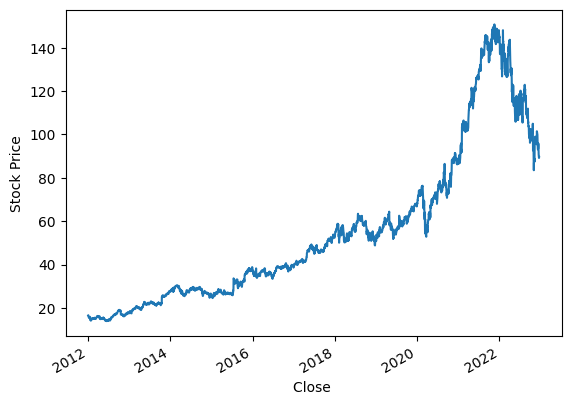

In [107]:
data['Close'].plot()
plt.xlabel('Close ')
plt.ylabel('Stock Price')

In [108]:
data.reset_index(inplace=True)   # reset index

## DATA PREPROCESSING

In [109]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [110]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500
2760,2022-12-20,88.730003,89.779999,88.040001,89.629997,89.629997,21976800


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2761 non-null   datetime64[ns]
 1   Open       2761 non-null   float64       
 2   High       2761 non-null   float64       
 3   Low        2761 non-null   float64       
 4   Close      2761 non-null   float64       
 5   Adj Close  2761 non-null   float64       
 6   Volume     2761 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 151.1 KB


In [112]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [113]:
open=data.iloc[:,1:-5].values
high=data.iloc[:,-5].values
low=data.iloc[:,-4].values
close=data.iloc[:,-3].values

## **PREDICT CLOSE PRICE**

In [114]:
# train test data
from sklearn.model_selection import train_test_split
open_train,open_test,close_train,close_test=train_test_split(open,close,test_size=0.30,random_state=42)

In [115]:
# model creation
from sklearn.linear_model import LinearRegression
close_model=LinearRegression()
close_model.fit(open_train,close_train)
closepred=close_model.predict(open_test)

In [116]:
print(close_model.predict([[88.730003]]))

[88.72183021]


In [117]:
# R2_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R2_score :',r2_score(close_test,closepred))
print('Mean Squared Error',mean_squared_error(close_test,closepred))
print('Mean Absolute Error',mean_absolute_error(close_test,closepred))

R2_score : 0.9992557325690279
Mean Squared Error 0.9794657086538795
Mean Absolute Error 0.5858527421102381


## **PREDICT LOW PRICE**

In [118]:
# train test data
open_train,open_test,low_train,low_test=train_test_split(open,low,test_size=0.30,random_state=42)

In [119]:
# model creation
from sklearn.linear_model import LinearRegression
low_model=LinearRegression()
low_model.fit(open_train,low_train)
lowpred=low_model.predict(open_test)

In [120]:
print(low_model.predict([[88.730003]]))

[87.80193693]


In [121]:
# Perfomance Evaluation
print('R2_score :',r2_score(low_test,lowpred))
print('MAE :',mean_absolute_error(low_test,lowpred))
print('MAE :',mean_squared_error(low_test,lowpred))

R2_score : 0.9996644571289188
MAE : 0.4020376021398164
MAE : 0.43113021045947736


## **PREDICT HIGH PRICE**

In [122]:
# train test data
open_train,open_test,high_train,high_test=train_test_split(open,high,test_size=0.30,random_state=42)

In [123]:
# model creation
from sklearn.linear_model import LinearRegression
high_model=LinearRegression()
high_model.fit(open_train,high_train)
highpred=high_model.predict(open_test)

In [124]:
print(high_model.predict([[88.730003]]))

[89.66326737]


In [125]:
# Perfomance Evaluation
print('R2_score :',r2_score(high_test,highpred))
print('MAE :',mean_absolute_error(high_test,highpred))
print('MAE :',mean_squared_error(high_test,highpred))

R2_score : 0.9996801011712484
MAE : 0.3879432074549163
MAE : 0.4312395717521196


## ERROR COMPARISON

In [126]:
dic={'high_actual':high_test,'high_pred':highpred,'high_erro':high_test-highpred,'low_actual':low_test,'low_pred':lowpred, 'low_error':low_test-lowpred, 'close_actual':close_test, 'close_pred':closepred, 'close_error':close_test-closepred}
df= pd.DataFrame(dic)
df

,high_actual,high_pred,high_erro,low_actual,low_pred,low_error,close_actual,close_pred,close_error
0,22.440886,22.439013,0.001872,22.000288,22.093766,-0.093478,22.035904,22.282251,-0.246348
1,91.199997,91.837864,-0.637867,88.925003,89.927491,-1.002488,89.150002,90.871044,-1.721042
2,41.946499,42.106226,-0.159727,41.635502,41.317432,0.318070,41.841000,41.719899,0.121101
3,100.209999,100.728449,-0.518449,96.760002,98.617569,-1.857567,97.309998,99.657853,-2.347855
4,28.704659,28.762368,-0.057710,28.076014,28.274513,-0.198499,28.278753,28.531797,-0.253044
...,...,...,...,...,...,...,...,...,...
824,149.156494,149.946779,-0.790285,147.199997,146.725898,0.474099,148.720505,148.301683,0.418822
825,112.005501,111.281842,0.723658,109.154251,108.932957,0.221295,111.666496,110.088062,1.578434
826,19.287207,19.333386,-0.046179,19.053831,19.058179,-0.004347,19.119585,19.212875,-0.093290
827,27.742332,27.833478,-0.091146,27.447641,27.366572,0.081069,27.699451,27.613750,0.085702


In [127]:
print(high_model.predict([[93.540001]]),low_model.predict([[93.540001]]),close_model.predict([[93.540001]]))

[94.52830601] [92.5572562] [93.53008165]


### **DEEP LEARNING**

In [128]:
x = data.iloc[:,4:-2].values
x

array([[16.57312965],
       [16.64461136],
       [16.41372681],
       ...,
       [90.86000061],
       [89.15000153],
       [89.62999725]])

In [129]:
# Standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(x)
scaled

array([[0.01936668],
       [0.01988927],
       [0.01820133],
       ...,
       [0.56245915],
       [0.54995778],
       [0.55346691]])

In [130]:
train_size = int(len(scaled) * 0.80)
test_size = len(scaled)-train_size
train_data, test_data = scaled[0:train_size,:], scaled[train_size-100:len(scaled),:]

In [131]:
time_step = 100
def create_sequences(data, time_step):
    x, y = [], []
    for i in range(len(data) - time_step):
        x.append(data[i : (i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(x), np.array(y)

In [132]:
x_train, y_train = create_sequences(train_data, time_step)
x_test, y_test = create_sequences(test_data, time_step)

In [133]:
# sample,time_steps,features
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [134]:
# model creation
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1),activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50,return_sequences = True,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.LSTM(units=25,activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(units=1))

In [135]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [136]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
66/66 [==============================] - 14s 149ms/step - loss: 0.0096
Epoch 2/5
66/66 [==============================] - 9s 134ms/step - loss: 0.0032
Epoch 3/5
66/66 [==============================] - 9s 131ms/step - loss: 0.0026
Epoch 4/5
66/66 [==============================] - 10s 145ms/step - loss: 0.0024
Epoch 5/5
66/66 [==============================] - 8s 121ms/step - loss: 0.0020


In [137]:
 # predicted value
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

18/18 [==============================] - 1s 36ms/step


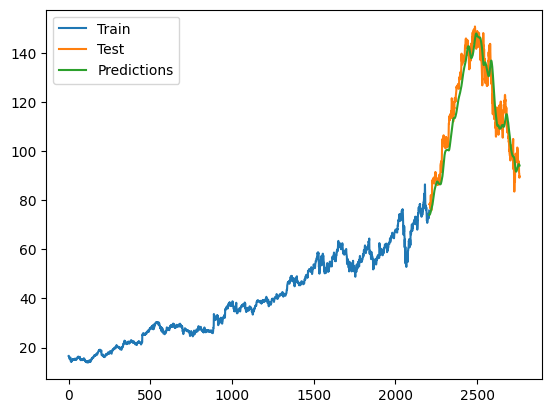

In [138]:
 # plot graph
train = data[:train_size].copy()
test = data[train_size:].copy()
test.insert(loc=7,
            column = 'pred',
            value=pred)

plt.plot(train.index,train['Close'])
plt.plot(test.index,test[['Close','pred']])
plt.legend(['Train','Test','Predictions'],loc='upper left')

In [139]:
predictedclose = test['pred'].to_numpy()
openvalue = test['Open'].to_numpy()

Trademade = predictedclose > openvalue

profit =[]
loss=[]
for k in range(0,len(Trademade)):
  if Trademade[k] == True:
    profit.append(predictedclose[k] - openvalue[k])
  else:
    profit.append(0)
  if Trademade[k] == False:
    loss.append(predictedclose[k] - openvalue[k])
  else:
    loss.append(0)

In [141]:
test.insert(loc = 8,
            column = 'Trade Made',
            value=Trademade)
test.insert(loc=9,
            column='Profit',
            value=profit)
test.insert(loc=10,
            column='Loss',
            value=loss)

In [143]:
test

,Date,Open,High,Low,Close,Adj Close,Volume,pred,Trade Made,Profit,Loss
2208,2020-10-12,77.150002,79.693001,76.628502,78.457497,78.457497,49652000,74.064560,False,0.000000,1.307495
2209,2020-10-13,79.186501,79.500000,78.160004,78.584000,78.584000,32020000,74.031929,False,0.000000,-0.602501
2210,2020-10-14,78.929497,79.384201,77.526497,78.403999,78.403999,38586000,74.068077,False,0.000000,-0.525497
2211,2020-10-15,77.357498,78.755249,77.251503,77.956497,77.956497,30800000,74.167206,False,0.000000,0.598999
2212,2020-10-16,78.292503,79.056503,78.150002,78.650497,78.650497,28694000,74.316429,False,0.000000,0.357994
...,...,...,...,...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900,94.628860,False,0.000000,-0.230003
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800,94.580482,True,-2.340004,0.000000
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500,94.477486,True,-0.339996,0.000000
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500,94.316727,True,-1.729996,0.000000


In [142]:
sum((1000/openvalue)*profit)

21.379378365037457